**Mount your Google Drive into the Colab environment**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


**Change current path to project path**

In [ ]:
# Assign the project path to a variable
project_path = '/content/gdrive/MyDrive/Reaserch/SLTrafficSignDetection/Training-3'

# Change the current directory to the project path
%cd $project_path

/content/gdrive/MyDrive/Reaserch/SLTrafficSignDetection/Training-3


**Check the current directory**

In [ ]:
%pwd

'/content/gdrive/MyDrive/Reaserch/SLTrafficSignDetection/Training-3'

**Install the Ultralytics package using pip**

In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 605.6/605.6 kB 8.3 MB/s eta 0:00:00


**Import the dataset**

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="5Nu3TCAJU6dnkxOiG5LX")
project = rf.workspace("traffic-sign-detection-tnjnh").project("sltsd")
dataset = project.version(3).download("yolov8")

# Or we can download a zip to computer and paste the dataset folder in project path

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.134 is required but found version=8.0.145, to fix: `pip install ultralytics==8.0.134`

**Training a model using the YOLOv8s model on a our importted custom dataset**

`task=detect`: This specifies the task to be performed, which is "detect" in this case.

`mode=train`: This indicates that the command is for training the YOLO model.

`model=yolov8s.pt`: This specifies the model to be used for training, which is "yolov8s.pt" in this case. The ".pt" extension suggests that this is a PyTorch model checkpoint. We can change the models to any depending on our specification.

| Model                                                                                | size<br><sup>(pixels) | mAP<sup>val<br>50-95 | Speed<br><sup>CPU ONNX<br>(ms) | Speed<br><sup>A100 TensorRT<br>(ms) | params<br><sup>(M) | FLOPs<br><sup>(B) |
| ------------------------------------------------------------------------------------ | --------------------- | -------------------- | ------------------------------ | ----------------------------------- | ------------------ | ----------------- |
| [YOLOv8n](https://github.com/ultralytics/assets/releases/download/v0.0.0/yolov8n.pt) | 640                   | 37.3                 | 80.4                           | 0.99                                | 3.2                | 8.7               |
| [YOLOv8s](https://github.com/ultralytics/assets/releases/download/v0.0.0/yolov8s.pt) | 640                   | 44.9                 | 128.4                          | 1.20                                | 11.2               | 28.6              |
| [YOLOv8m](https://github.com/ultralytics/assets/releases/download/v0.0.0/yolov8m.pt) | 640                   | 50.2                 | 234.7                          | 1.83                                | 25.9               | 78.9              |
| [YOLOv8l](https://github.com/ultralytics/assets/releases/download/v0.0.0/yolov8l.pt) | 640                   | 52.9                 | 375.2                          | 2.39                                | 43.7               | 165.2             |
| [YOLOv8x](https://github.com/ultralytics/assets/releases/download/v0.0.0/yolov8x.pt) | 640                   | 53.9                 | 479.1                          | 3.53                                | 68.2               | 257.8             |

`data=/content/gdrive/MyDrive/Reaserch/Training-2/SLTSD-2/data.yaml`: This points to the configuration file (data.yaml) that contains information about the custom dataset.

`epochs=300`: This specifies the number of training epochs. Training an object detection model involves running the optimization process over the entire dataset multiple times, with each pass through the dataset being an epoch.

`plots=True`: This indicates that plots, such as loss curves and other training metrics, will be generated during training to help visualize the model's progress.

In [ ]:
!yolo task=detect mode=train model=yolov8s.pt data=$project_path/SLTSD.v3i.yolov8/data.yaml epochs=300 plots=True

100% 21.5M/21.5M [00:00<00:00, 53.6MB/s]
Ultralytics YOLOv8.0.145 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/gdrive/MyDrive/Reaserch/SLTrafficSignDetection/Training-3/SLTSD.v3i.yolov8/data.yaml, epochs=300, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=No

**Here are the results of training a traffic sign detection model with YOLOv8:**

*   The confusion matrix returned after training

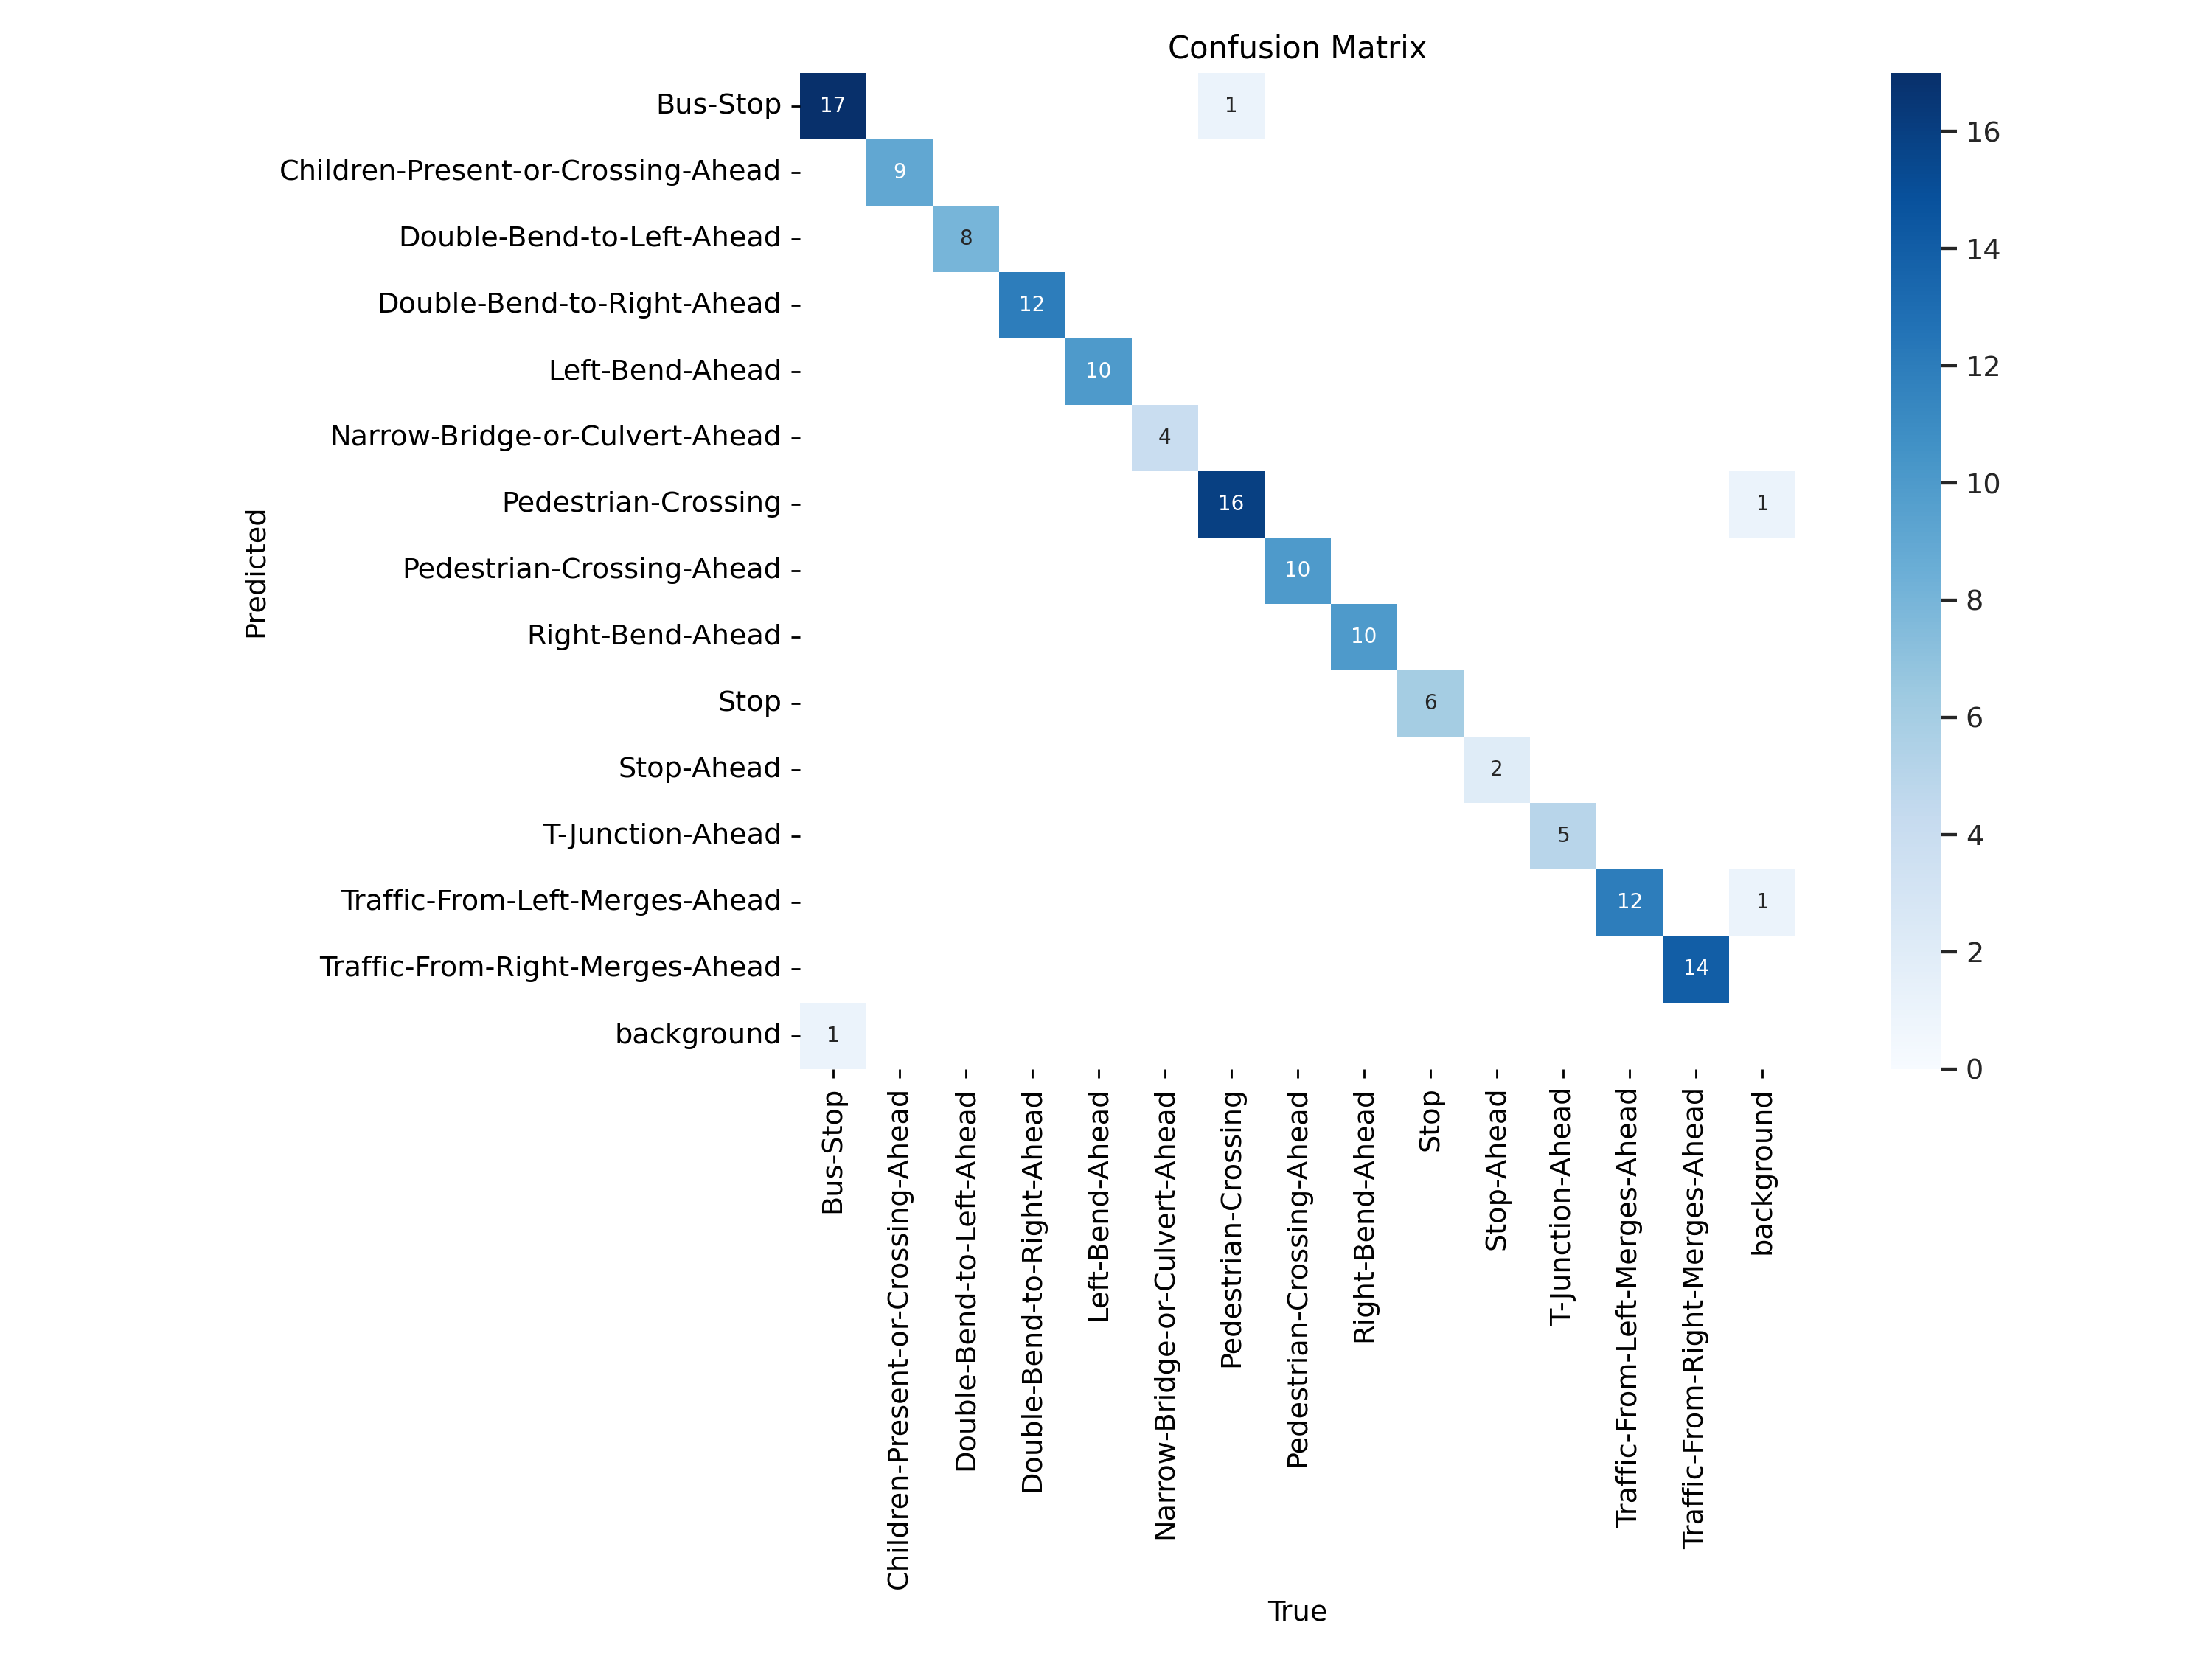

In [ ]:
from IPython.display import display, Image
Image(filename=f'/content/gdrive/MyDrive/Reaserch/SLTrafficSignDetection/Training-3/runs/detect/train/confusion_matrix.png', width=600)

*   Key metrics tracked by YOLOv8

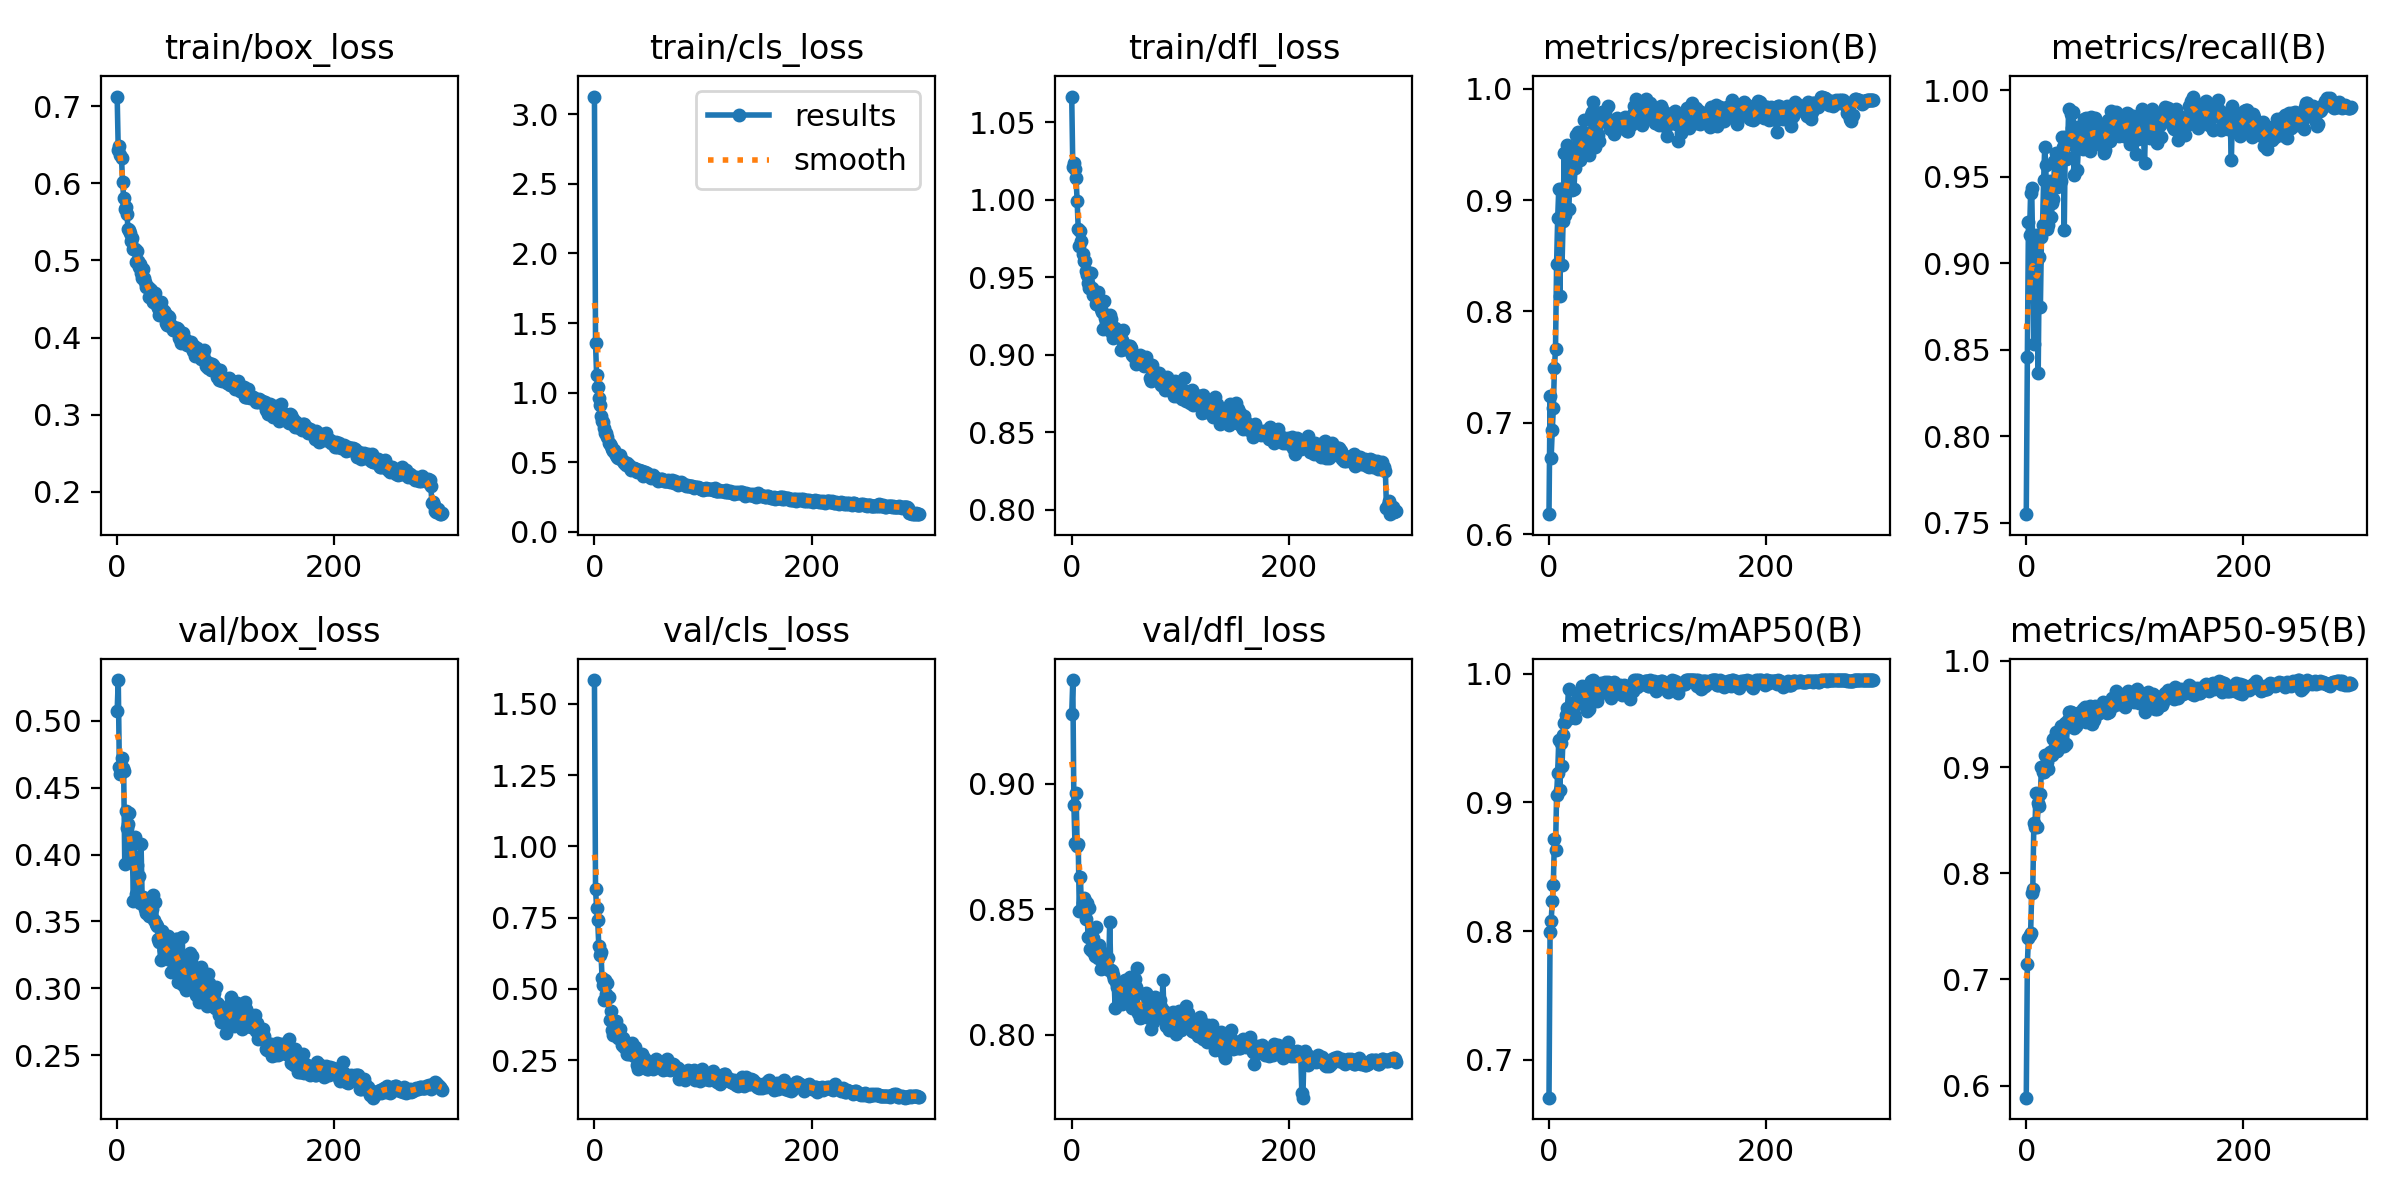

In [ ]:
Image(filename=f'/content/gdrive/MyDrive/Reaserch/SLTrafficSignDetection/Training-3/runs/detect/train/results.png', width=800)

**Validate The Model**

In [ ]:
!yolo task=detect mode=val model=$project_path/runs/detect/train/weights/best.pt data=$project_path/SLTSD.v3i.yolov8/data.yaml

Ultralytics YOLOv8.0.145 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11131002 parameters, 0 gradients
val: Scanning /content/gdrive/MyDrive/Reaserch/SLTrafficSignDetection/Training-3/SLTSD.v3i.yolov8/valid/labels.cache... 135 images, 0 backgrounds, 0 corrupt: 100% 135/135 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 9/9 [00:04<00:00,  2.20it/s]
                   all        135        137      0.989       0.98      0.994      0.981
              Bus-Stop        135         18      0.998      0.944      0.992      0.968
Children-Present-or-Crossing-Ahead        135          9      0.994          1      0.995      0.995
Double-Bend-to-Left-Ahead        135          8      0.995          1      0.995      0.974
Double-Bend-to-Right-Ahead        135         12      0.994          1      0.995       0.98
       Left-Bend-Ahead        135         10          1      0.922   

**Predict with the Model**

`conf=0.25`: This sets the confidence threshold for object detection to 0.25. It means that objects detected with a confidence score greater than or equal to 0.25 will be considered valid detections.

In [ ]:
!yolo task=detect mode=predict model=$project_path/runs/detect/train/weights/best.pt conf=0.25 source=$project_path/SLTSD.v3i.yolov8/test/images save=True

Ultralytics YOLOv8.0.145 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11131002 parameters, 0 gradients

image 1/64 /content/gdrive/MyDrive/Reaserch/SLTrafficSignDetection/Training-3/SLTSD.v3i.yolov8/test/images/10-5-_jpg.rf.0eeaf62f73587134dff22a002383fbc3.jpg: 640x640 1 Pedestrian-Crossing, 16.4ms
image 2/64 /content/gdrive/MyDrive/Reaserch/SLTrafficSignDetection/Training-3/SLTSD.v3i.yolov8/test/images/6-11-_jpg.rf.ecacc2bdc5a7d87212b364f486004fa0.jpg: 640x640 1 Bus-Stop, 16.4ms
image 3/64 /content/gdrive/MyDrive/Reaserch/SLTrafficSignDetection/Training-3/SLTSD.v3i.yolov8/test/images/IMG_4881_JPG_jpg.rf.acd8cf356331da0d9e70fd83428edebc.jpg: 640x640 1 Traffic-From-Left-Merges-Ahead, 16.4ms
image 4/64 /content/gdrive/MyDrive/Reaserch/SLTrafficSignDetection/Training-3/SLTSD.v3i.yolov8/test/images/IMG_4958_JPG_jpg.rf.4aa14fa3e10723f164f385014f844d5a.jpg: 640x640 1 Traffic-From-Left-Merges-Ahead, 16.4ms
image 5/64 /content/gdrive/MyDrive/

**Let's take a look at few results.**

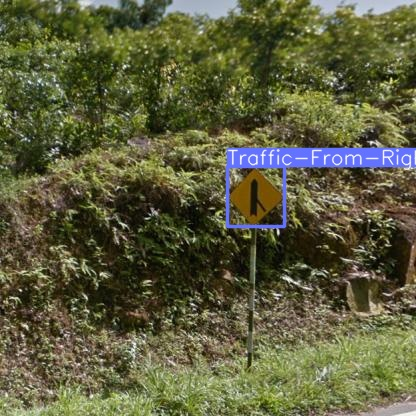

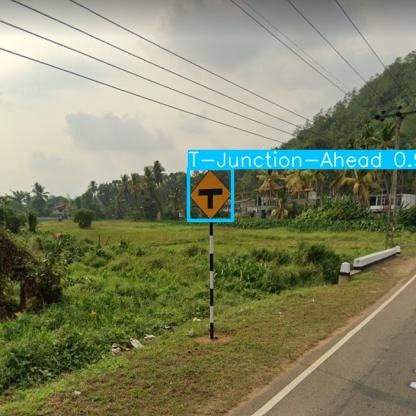

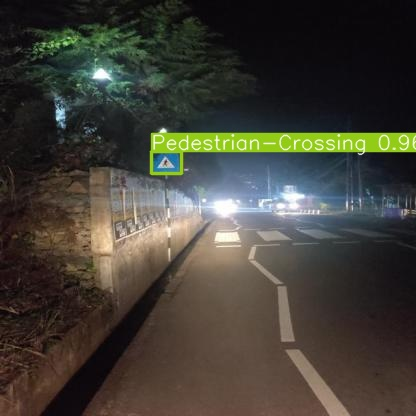

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/gdrive/MyDrive/Reaserch/SLTrafficSignDetection/Training-3/runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=300))
      print("\n")